In [106]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

data = pd.read_csv('https://bit.ly/wine_csv_data')

In [107]:
data

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0
...,...,...,...,...
6492,11.2,1.6,3.27,1.0
6493,9.6,8.0,3.15,1.0
6494,9.4,1.2,2.99,1.0
6495,12.8,1.1,3.34,1.0


In [108]:
data['class'].shape

(6497,)

In [109]:
data.shape

(6497, 4)

In [121]:
from sklearn.model_selection import train_test_split


x_data=data.loc[:, ['alcohol', 'sugar', 'pH']]
y_data=data.loc[:, 'class']
X_train, X_test, y_train, y_test=train_test_split(x_data,
                                                  y_data,
                                                  test_size=0.2,
                                                  shuffle=True,
                                                  random_state=12)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(5197, 3) (5197,)
(1300, 3) (1300,)


In [122]:
type(X_train)

pandas.core.frame.DataFrame

In [123]:
X_train.to_numpy
X_test.to_numpy
y_train.to_numpy
y_test.to_numpy

<bound method IndexOpsMixin.to_numpy of 3607    1.0
3985    1.0
3465    1.0
1749    1.0
641     0.0
       ... 
6081    1.0
5019    1.0
3154    1.0
6032    1.0
2040    1.0
Name: class, Length: 1300, dtype: float64>

In [124]:
from keras import models
from keras import layers

def build_model(): 
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',input_shape=(X_train.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model


In [125]:
model = build_model() 
model.fit(X_train, y_train, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

41/41 [==============================] - 0s 930us/step - loss: 0.0857 - mae: 0.1791


In [126]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD,Adam
from keras.layers import Input, Dense
from keras.models import Model

# 이는 텐서를 반환합니다
inputs = Input(shape=(3,))
x = Dense(10, activation='relu')(inputs)
x2 = Dense(12, activation='relu')(x)
x3 = Dense(15, activation='relu')(x2)
output=Dense(2,activation='softmax')(x3)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_101 (Dense)           (None, 64)                256       
                                                                 
 dense_102 (Dense)           (None, 64)                4160      
                                                                 
 dense_103 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,481
Trainable params: 4,481
Non-trainable params: 0
_________________________________________________________________


In [127]:
#fitting the model and predicting 

# fit network
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0990 - mae: 0.2008 - val_loss: 0.0858 - val_mae: 0.1937
Epoch 2/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0991 - mae: 0.2026 - val_loss: 0.0886 - val_mae: 0.1854
Epoch 3/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0986 - mae: 0.2003 - val_loss: 0.0880 - val_mae: 0.1795
Epoch 4/100
163/163 [==============================] - 0s 3ms/step - loss: 0.0989 - mae: 0.2004 - val_loss: 0.0862 - val_mae: 0.1734
Epoch 5/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0990 - mae: 0.2015 - val_loss: 0.0839 - val_mae: 0.1776
Epoch 6/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0983 - mae: 0.2002 - val_loss: 0.0852 - val_mae: 0.1844
Epoch 7/100
163/163 [==============================] - 0s 2ms/step - loss: 0.0992 - mae: 0.2015 - val_loss: 0.0873 - val_mae: 0.1917
Epoch 8/100
163/163 [==============================] - 0s 2ms/step - 

ValueError: `axis` must be fewer than the number of dimensions (1)

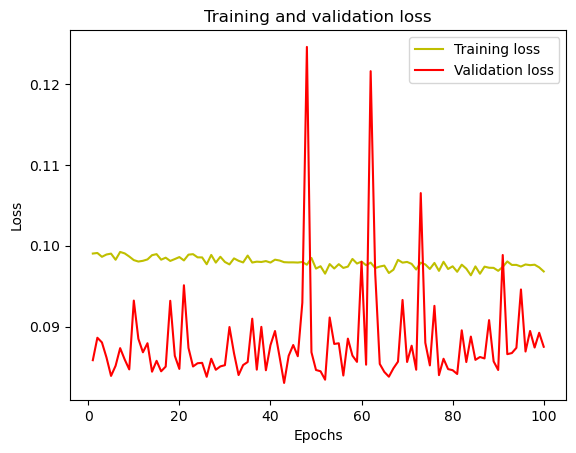

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [130]:
acc = model_history.history['accuracy']
val_acc =model_history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

KeyError: 'accuracy'

In [131]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.24      1.00      0.39       311
           1       0.00      0.00      0.00       989

    accuracy                           0.24      1300
   macro avg       0.12      0.50      0.19      1300
weighted avg       0.06      0.24      0.09      1300

[[311   0]
 [989   0]]


c:\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\new\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
